<a href="https://colab.research.google.com/github/MuhammadKhairunnasNurdin/PCVK_Ganjil_2024/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Practicum Task**

## **Number 1**
Make Gamma Correction according to the following instructions

   This experiment will ask you to make a Gamma Correction.  In this experiment, the Gamma value will be set by asking for input from the user.  Here is the code to request value input from the user.  Continue the code by creating an image with gamma correction according to the formula given.

### **Import Library and Show Image**

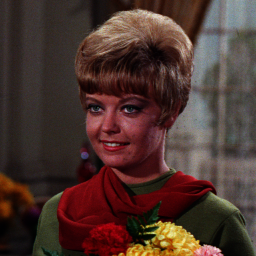

In [21]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, log10
import numpy as np

female_img = cv.imread('/content/drive/MyDrive/PCVK-Asset/female.tiff')
cv2_imshow(female_img)

### **Function for Gamma Correction**

 Gamma Correction in image
----------------------------------
Input Gamma value: 3


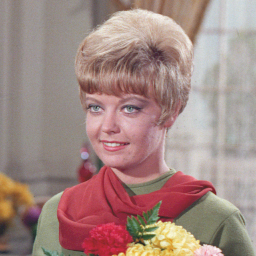

In [22]:
def gamma_correction(img, gamma):
  # Normalize Image to  [0,1]
  normalized = img / 255.0
  corrected = np.power(normalized, 1.0 / gamma)
  return np.uint8(corrected * 255)

# show image with Gamma Correction
print(' Gamma Correction in image')
print('----------------------------------')
try:
  gamma = int(input('Input Gamma value: '))
except ValueError:
  print('Error, not a number')

gamma_img = gamma_correction(female_img, gamma)
cv2_imshow(gamma_img)

## **Number 2**

Create Image Depth Simulation

 This experiment is used as a simulation of the image quantization process.  In image quantization, pixels can be represented with n-bit depth (default uses 8-bit).  On an 8-bit pixel, the possible colors are 256 colors, from 0 (0000 0000) to 255(1111 1111).  On a 7-bit pixel, the possible colors are 128 colors, from 0 (0000000) to 127 (111 1111).  The possible colors are obtained from the power of 2 of the number of bits.  If 7bit, then the number of colors is 27 = 128, etc.

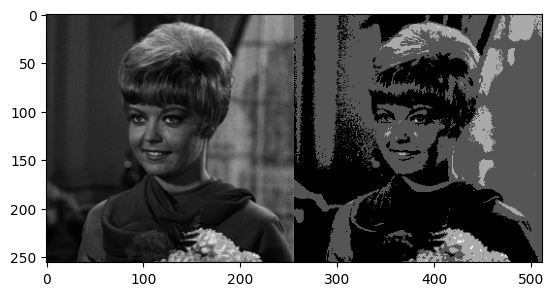

In [23]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/PCVK-Asset/female.tiff', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.round(original[y, x] / level) * level

frame = cv.hconcat([original, depth_image])
plt.imshow(frame, cmap='gray')

## **Number 3**

Create an average denoising module according to the formula given in the previous sub-chapter.  The original image is provided at /images/galaxy.jpg.  100 Images with Gaussian Noise are provided in /images/noises/*.jpg You can use the following code to read all images in one folder, use the glob module (import glob).

### **Import a clear and noise Galaxy Images**

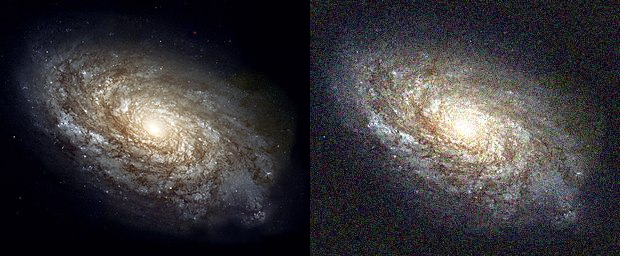

In [24]:
import glob

galaxy = cv.imread('/content/drive/MyDrive/PCVK-Asset/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK-Asset/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

# show different clear and noised image
frame = cv.hconcat([galaxy,cv_img[0]])
cv2_imshow(frame)

### **Average Denoising**

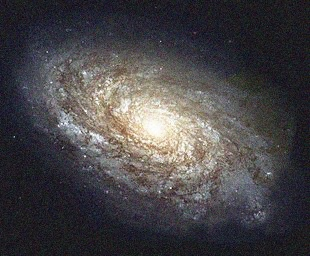

Sum Images:  5
PSNR:  19.407254332381797


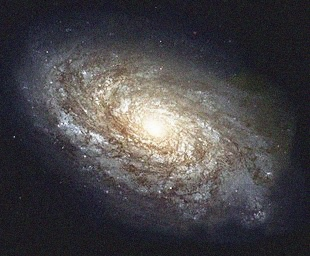

Sum Images:  10
PSNR:  19.594920772997288


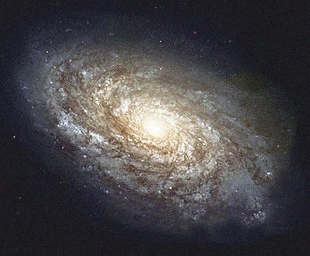

Sum Images:  20
PSNR:  19.683452462717007


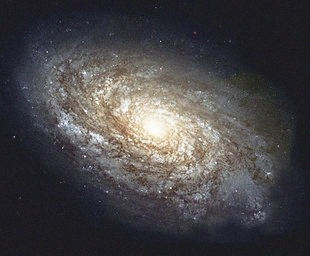

Sum Images:  40
PSNR:  19.72864824783067


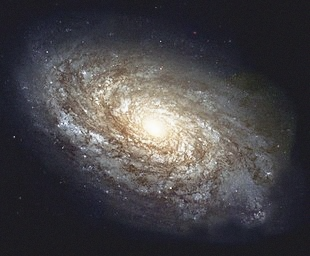

Sum Images:  80
PSNR:  19.75255922631199


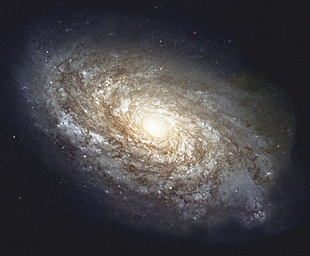

Sum Images:  100
PSNR:  19.758317288501708


In [25]:
# create function to do Peak-to-Noise Ration
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  # if MSE is 0, mean no noise detected, so PSNR not required anymore
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# function to averaging process for each images with noised galaxy images
def image_averaging(list_img, total_image):
  avg_img = np.zeros(list_img[0].shape)
  for i in range(total_image):
    avg_img += list_img[i]

  avg_img /= total_image
  return avg_img

# do average denoising process for each 5, 10, so on, we print result
sum_images = np.array([5,10,20,40,80,100])
list_denoised_image = []
for i in sum_images:
  denoised_image = image_averaging(cv_img, i)
  list_denoised_image.append(denoised_image)
  cv2_imshow(denoised_image)
  print('Sum Images: ', i)
  print('PSNR: ', PSNR(galaxy,denoised_image))


## **Number 4**

Create a masking image for the following image.  The left image is the original image (KTP image), while the rightmost image is the result:

### **Import KTP image and Show it**

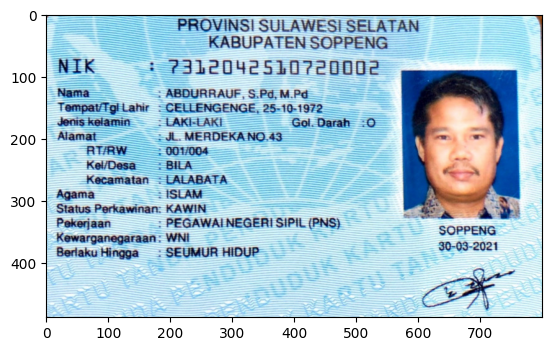

In [26]:
ktp = cv.imread('/content/drive/MyDrive/PCVK-Asset/KTP.jpeg')

plt.imshow(cv.cvtColor(ktp,cv.COLOR_BGR2RGB))
plt.show()

### **Masking process**
here i will mask in ear area

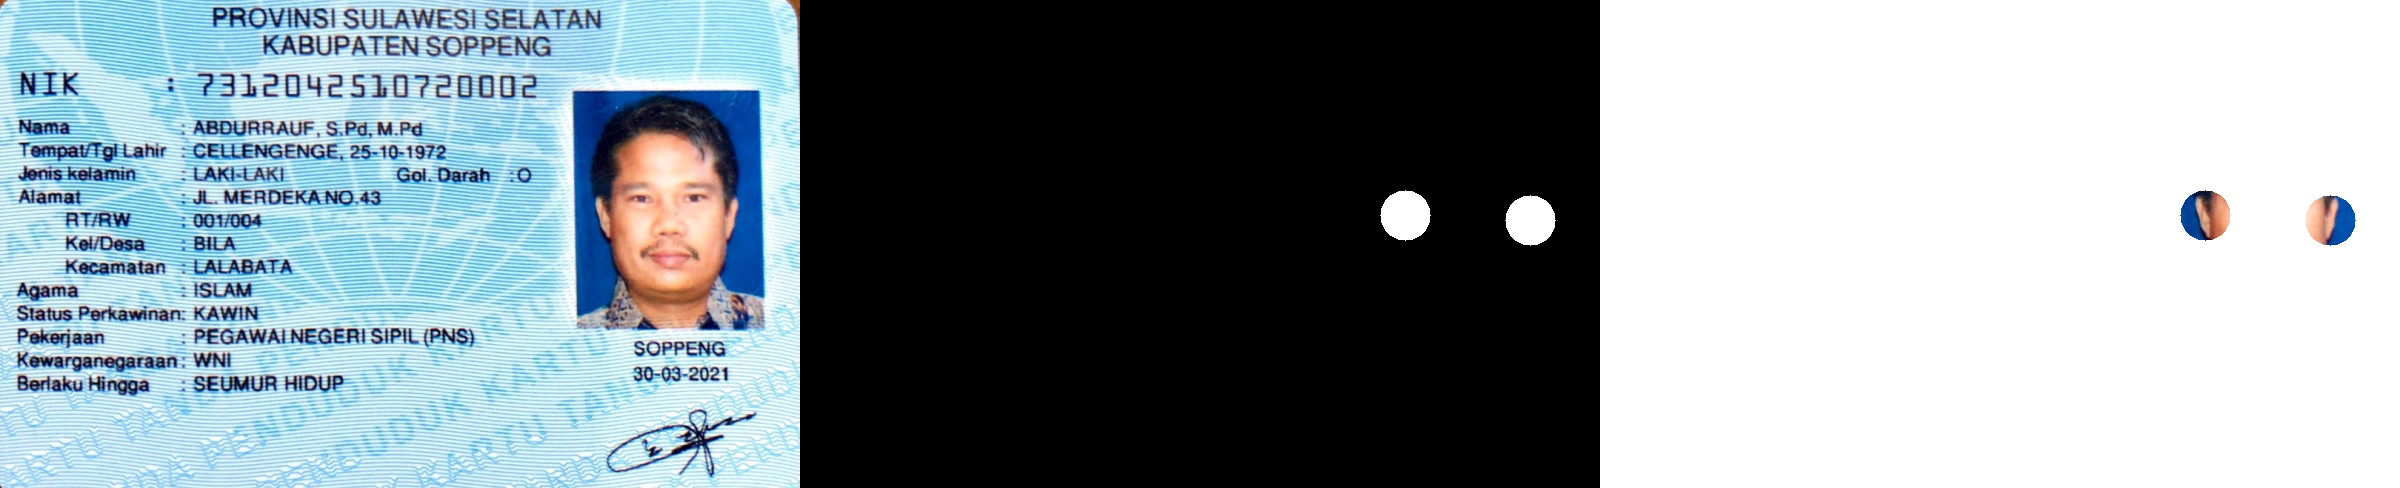

In [27]:
circle_mask = np.zeros(ktp.shape[:2], dtype="uint8")

cv.circle(circle_mask, (605, 215), 25, 255, -1)
cv.circle(circle_mask, (730, 220), 25, 255, -1)


# Invers mask (white area became blak and vice versa)
inverse_mask = cv.bitwise_not(circle_mask)

# create white image
white_background = np.ones_like(ktp) * 255

# Mask KTP image in previous mask value
ktp_and = cv.bitwise_and(ktp, ktp, mask=circle_mask)

# Mask white area for black part
white_part = cv.bitwise_and(white_background, white_background, mask=inverse_mask)

# Concat result
final_result = cv.add(ktp_and, white_part)

# Show
frame = cv.hconcat([ktp,cv.cvtColor(circle_mask, cv.COLOR_GRAY2BGR),final_result])
cv2_imshow(frame)

## **Number 5**

Experiment using other operators and show the results in this module.  Write down the results of your analysis as to why the output image is like that.

### **Not Operator**

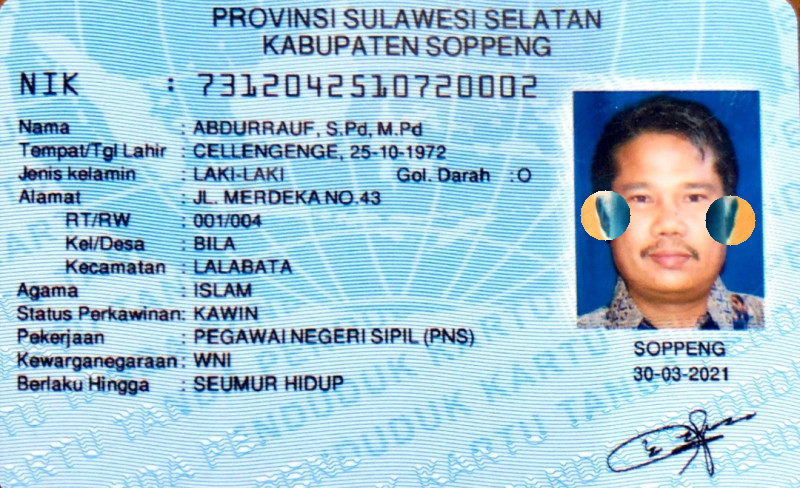

In [28]:
ktp_not = cv.bitwise_not(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_not)

**explanation**:
NOT (cv2.bitwise_not):

- This operation inverts the pixel values.
- For a mask, all black pixels (value 0) become white (value 255), and all white pixels (value 255) become black (value 0).
- Why this result?: It’s like flipping a switch—what was "off" becomes "on," and vice versa.

### **OR Operator**

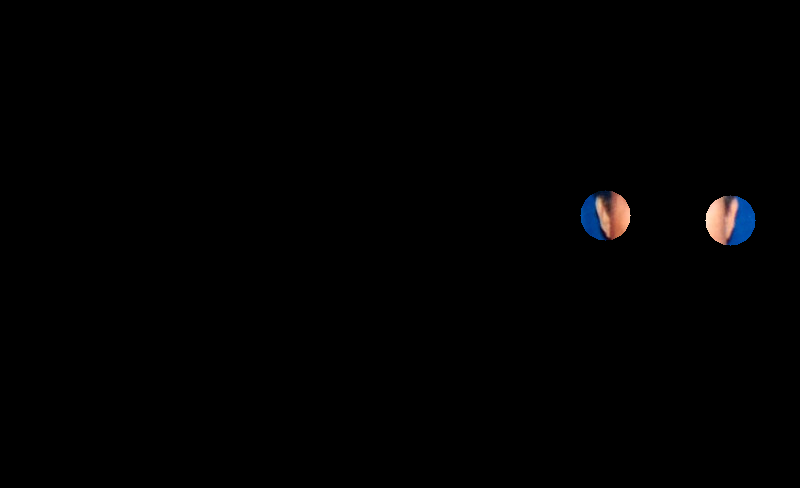

In [29]:
ktp_or = cv.bitwise_or(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_or)

**explanation**:
OR (cv2.bitwise_or):

- It combines two images or an image and a mask.
- If either of the pixel values in the two images is non-zero (i.e., "on"), the result pixel is set to "on" (white).
- Why this result?: OR only requires one of the two pixels to be "on" (white). So, the result will be "on" wherever at least one input image has a bright pixel.

### **AND Operator**

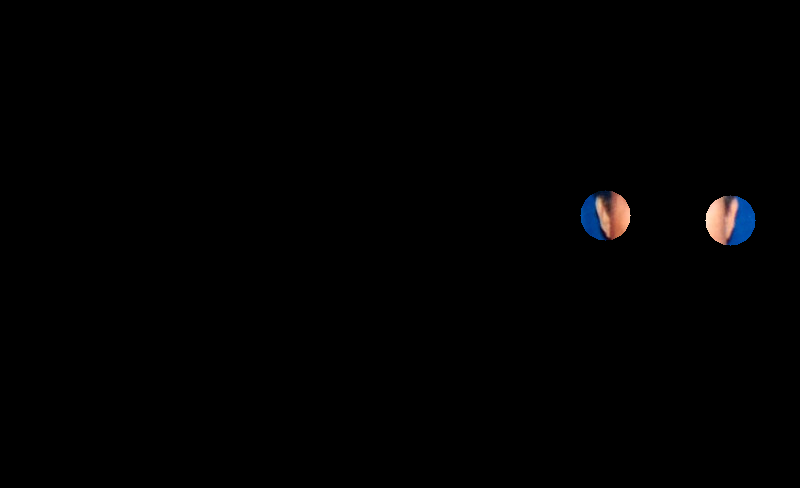

In [30]:
ktp_and = cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_and)

**explanation**:
AND (cv2.bitwise_and):

- This keeps only the parts where both input images or the image and mask have non-zero pixel values.
- If both pixels are "on" (white), the result is "on" (white), otherwise it's "off" (black).
- Why this result?: AND only returns white if both input pixels are white—this is useful for keeping only the regions of interest where both images overlap.

### **NAND Operator**

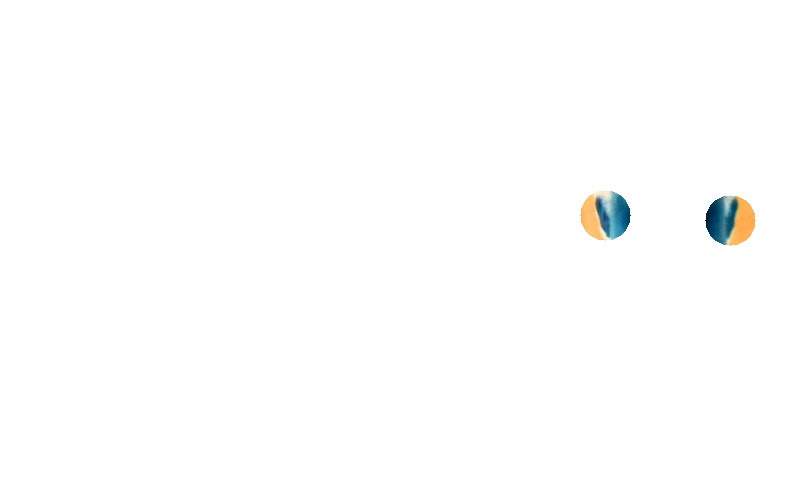

In [31]:
ktp_nand = cv.bitwise_not(cv.bitwise_and(ktp,ktp.copy(),mask=circle_mask))
cv2_imshow(ktp_nand)

**explanation**:
- NAND is a combination of AND followed by NOT.
- It returns the opposite of AND. So, pixels are "off" (black) only when both input pixels are white; otherwise, the result is "on" (white).
- Why this result?: NAND gives a "negative" of the AND operation, inverting the regions where both images were "on."

### **XOR Operator**

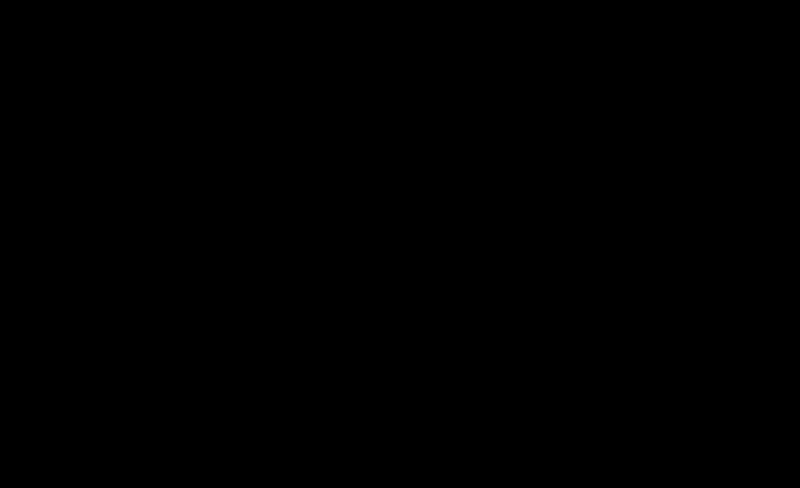

In [32]:
ktp_xor = cv.bitwise_xor(ktp,ktp.copy(),mask=circle_mask)
cv2_imshow(ktp_xor)

**explanation**:
XOR (cv2.bitwise_xor):

- This returns white pixels only when the pixels from either one of the images are "on," but not both.
- If both pixels are the same (both "on" or both "off"), the result is black.
- Why this result?: XOR is like finding the difference between the two images—if the pixels are different, you get white; if they’re the same, you get black.